In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("daily-min-temperatures.csv",parse_dates=['Date'],index_col="Date")
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


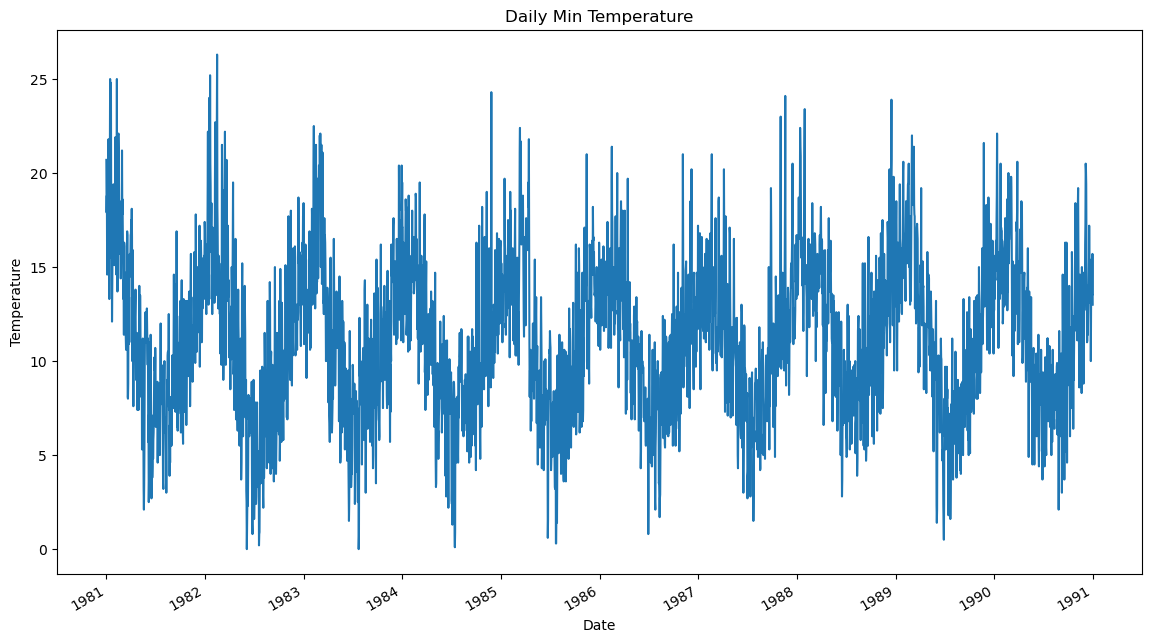

In [4]:
df.plot(title="Daily Min Temperature",figsize=(14,8),legend=None)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

In [5]:
series = pd.read_csv("daily-min-temperatures.csv",index_col=0,parse_dates=True)

In [6]:
difference = series.diff(periods=1)

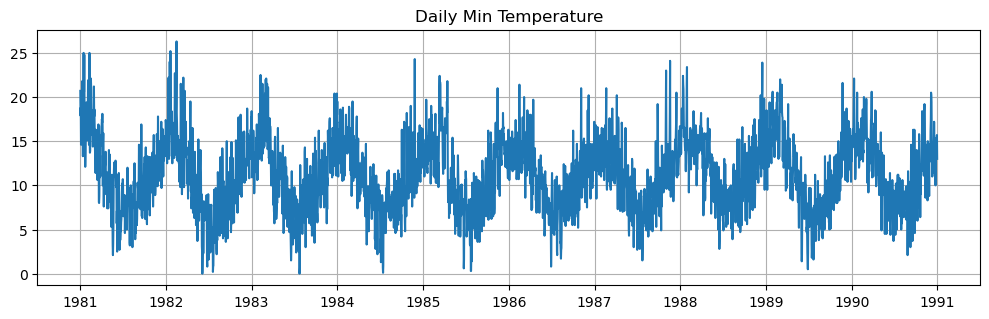

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(series,label="Original Series")
plt.title("Daily Min Temperature")
plt.grid()
plt.tight_layout()
plt.show()

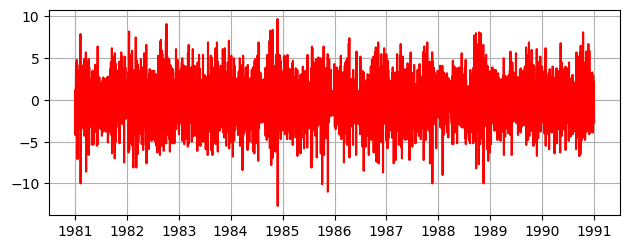

In [12]:
plt.subplot(2,1,2)
plt.plot(difference,label="Differenced Time series",color="red")
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
#Manual Differencing

In [16]:
series1 = pd.read_csv("daily-min-temperatures.csv",header=0,index_col=0)

In [19]:
X=series1.values
diff=list()
days_in_year=365

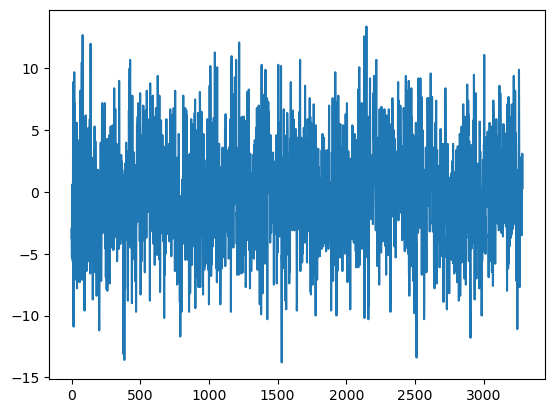

In [20]:
for i in range(days_in_year, len(X)):
    value = X[i] - X[i-days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

In [21]:
from numpy import polyfit

In [24]:
series = pd.read_csv("daily-min-temperatures.csv",header=0,index_col=0)
X = [i %365 for i in range(0,len(series))]
y = series.values
degree = 4
coef = polyfit(X,y,degree)
print(coef)

[[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


In [29]:
curve = list()

for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value = value+X[i]**(degree-d) * coef[d]
        curve.append(value)

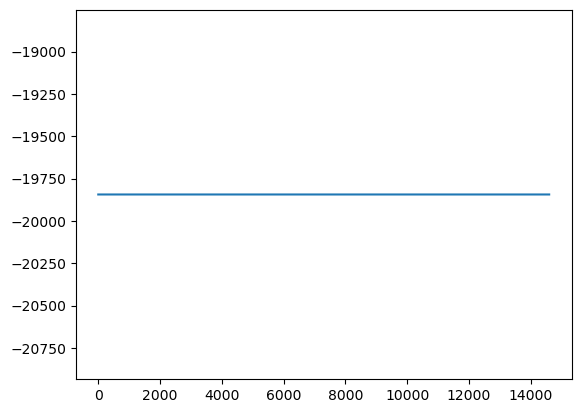

In [30]:
plt.plot(curve)
plt.show()